## Projektna naloga

Podatkovno rudarjenje, naloga, `01.04.2020`  
**`Matej Laurencic`**

### Podatki

Predstavitev vseh iger glede na:
<br>kategorijo - categories
<br>izdajalca - developer
<br>uspešnost - (positive_ratings / (positive_ratings + negative_ratings )) / owners
<br>trenutno igranost - average_playtime / median_playtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from csv import DictReader
import matplotlib.pyplot as plt

csfont = {'fontname':'Microsoft YaHei'} #kitajski font

r = DictReader(open('Data/steam.csv', 'rt', encoding='utf-8'))
sloCat = dict()
sloDev = dict()
for row in r:
    sloCat[row["name"]] = row["categories"]
    sloDev[row["name"]] = row["developer"] 

Si shranimo podatke o kategorijah in izdejalcev v dva različna slovarja.

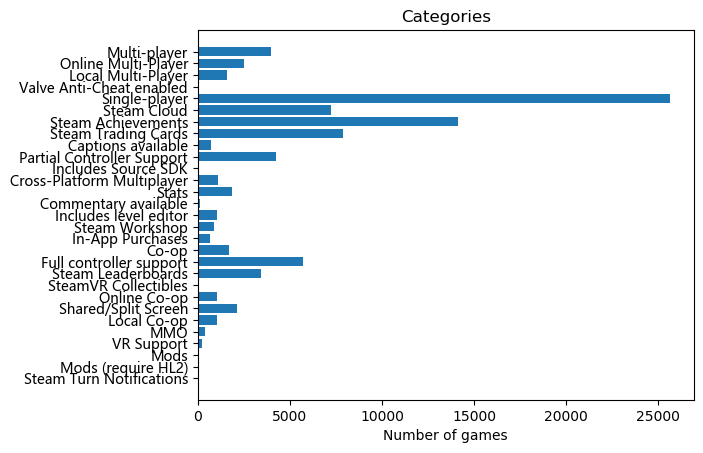

In [2]:
#kategorijo - categories

categories = {}
for key in sloCat:
    ele = sloCat[key].split(';')
    for e in ele:
        if categories.__contains__(e):
            categories[e] += 1
        else:
            categories[e] = 1

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(list(categories.keys())))
ax.barh(y_pos, categories.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(categories.keys()), **csfont)
ax.invert_yaxis()
ax.set_xlabel('Number of games')
ax.set_title('Categories')
plt.show()

Za vsako kategorijo, preštejem koliko igr pripada in nato narišem graf, za lapši prikaz.

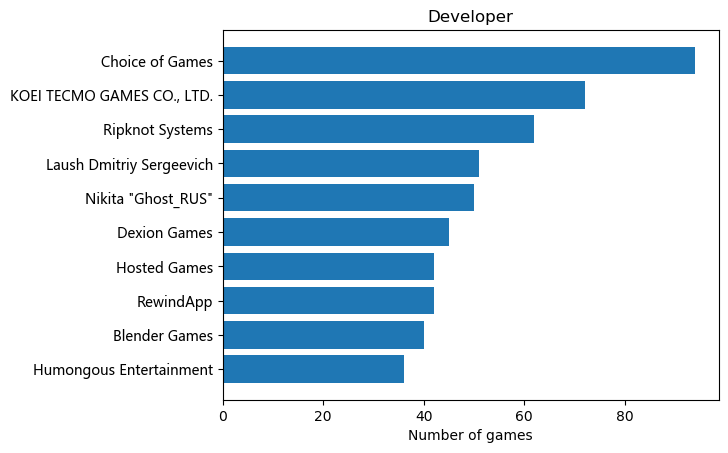

In [3]:
#izdajalca - developer

stIzpisov=10 #število igr za izpisat

developer = {}
for key in sloDev:
    if developer.__contains__(sloDev[key]):
        developer[sloDev[key]] += 1
    else:
        developer[sloDev[key]] = 1

developer = {k: v for k, v in sorted(developer.items(), key=lambda item: item[1], reverse=True)}
developer = {k: developer[k] for k in list(developer.keys())[:stIzpisov]}
 
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(list(developer.keys())))
ax.barh(y_pos, developer.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(developer.keys()), **csfont)
ax.invert_yaxis()
ax.set_xlabel('Number of games')
ax.set_title('Developer')
plt.show()

Za vsakega izdajalca preštejem koliko igr je izdal in narišem graf.

In [4]:
#uspešnost - (positive_ratings / (positive_ratings + negative_ratings )) / owners

stIzpisov=10 #število igr za izpisat

s = DictReader(open('Data/steam.csv', 'rt', encoding='utf-8'))
sloUsp = dict()
for row in s:
    t1 = int(row["positive_ratings"])
    t2 = int(row["negative_ratings"])
    t3 = row["owners"]
    tele = t3.split('-')
    for i in range(0, len(tele)): 
        tele[i] = int(tele[i]) 
    t3 = sum(tele)/2
    rez = (t1 / (t1 + t2)) / t3
    if rez != 0.0:
        sloUsp[row["name"]] = 1-rez
    
sloUsp = {k: v for k, v in sorted(sloUsp.items(), key=lambda item: item[1], reverse=True)}
sloUsp = {k: sloUsp[k] for k in list(sloUsp.keys())[:stIzpisov]}

#plt.rcdefaults()
#fig, ax = plt.subplots()
#y_pos = np.arange(len(list(sloUsp.keys())))
#ax.barh(y_pos, sloUsp.values(), align='center')
#ax.set_yticks(y_pos)
#ax.set_yticklabels(list(sloUsp.keys()))
#ax.invert_yaxis()
#ax.set_xlabel('Number of games')
#ax.set_title('Success')
#plt.show()

i = 1
for ele in sloUsp:
    print("%s) %s" % (i, ele))
    i = i+1

1) Dota 2
2) PLAYERUNKNOWN'S BATTLEGROUNDS
3) Counter-Strike: Global Offensive
4) Unturned
5) Warframe
6) Team Fortress 2
7) Z1 Battle Royale
8) Heroes & Generals
9) Warface
10) Grand Theft Auto V


Za preverit uspešnost igre, sem najprej izračunal, koliko pozitivnih ocen ima v odstotkih, nato pa delil s številom lastnikom. Upošteval sem tudi število lastnikov, ker čene lahko ena igrica je imela malo ocen ampak vse pozitivne, in zaredi tega uspešnost bi bila najboljša. Na zadnje sem tudi narisal graf, ampak sem upošteval 10 najboljših igr.

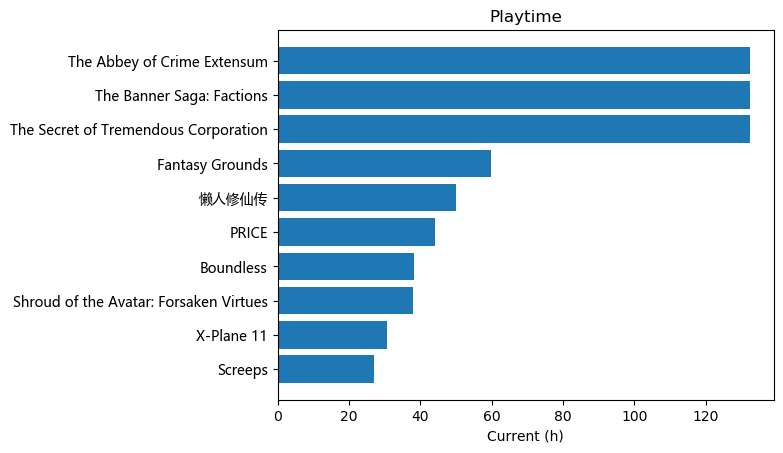

In [5]:
#trenutno igranost - average_playtime / median_playtime

stIzpisov=10 #število igr za izpisat

a = DictReader(open('Data/steam.csv', 'rt', encoding='utf-8'))
sloPly = dict()
for row in a:
    avr = float(row["median_playtime"])
    if avr > 0.0:
        avr = (avr / 60) / 24
        sloPly[row["name"]] = avr

sloPly = {k: v for k, v in sorted(sloPly.items(), key=lambda item: item[1], reverse=True)}
sloPly = {k: sloPly[k] for k in list(sloPly.keys())[:stIzpisov]}

plt.rcdefaults()
fig, ax = plt.subplots() 
y_pos = np.arange(len(list(sloPly.keys())))
ax.barh(y_pos, sloPly.values(), align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sloPly.keys()), **csfont)
ax.invert_yaxis()
ax.set_xlabel('Current (h)')
ax.set_title('Playtime')
plt.show()

Za igranost neke igre, sem upošteval samo vrednost 'median playtime'. Za narisati graf sem upošteval 10 najbolj igrane igre.

In [ ]:
t = DictReader(open('Data/steam.csv', 'rt', encoding='utf-8'))
podatki = list(t)

iskano = "Counter-Strike" #vnesi podatek za iskano igro

for ele in podatki:
    if iskano in ele.values():
        for e in ele:
            print("%s : %s " % (e, ele[e]))